In [1]:
from PIL import Image
import numpy as np

In [2]:
# Caminhos para as imagens
path_G = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/G_50_PNG.png"
path_R = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/R_25_PNG.png"
path_I = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/I_25_PNG_corrected.png"
path_Z = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/Z_25_PNG_corrected.png"

In [3]:
# Abrir as imagens
img_G = Image.open(path_G).convert("L")
img_R = Image.open(path_R).convert("L")
img_I = Image.open(path_I).convert("L")
img_Z = Image.open(path_Z).convert("L")

In [4]:
#Melhor combinação até agora (usando a segunda tentativa)
G = 0.3
R = 1.0
I = 0.3
Z = 1.6

In [5]:
#G = 0.0
#R = 1.0
#I = 0.0
#Z = 0.0

In [6]:
GRIZ = G + R + I + Z
F = 1/GRIZ

In [7]:
###############################################################################################
# Primeira tentativa de criar uma cor real
#https://www.365astronomy.com/antlia-sloan-griz-filter-set-50mm-round
#https://academo.org/demos/wavelength-to-colour-relationship/
#weight_G_R = (0/255)*G*F  # 475 nm
#weight_G_G = (192/255)*G*F  # 475 nm
#weight_G_B = (255/255)*G*F  # 475 nm
#weight_R_R = (255/255)*R*F  # 620 nm
#weight_R_G = (119/255)*R*F  # 620 nm
#weight_R_B = (0/255)*R*F  # 620 nm
#weight_I_R = (190/255)*I*F  # 770 nm
#weight_I_G = (0/255)*I*F  # 770 nm
#weight_I_B = (0/255)*I*F  # 770 nm
#weight_Z_R = (0/255)*Z*F  # 966 (483) nm
#weight_Z_G = (226/255)*Z*F  # 966 (483) nm
#weight_Z_B = (255/255)*Z*F  # 966 (483) nm
#Valores de A que ficaram bons: G=2.5, R=2.3, I=1.1 e Z=2.5
################################################################################################

In [8]:
###############################################################################################
# Segunda tentativa de criar uma cor real
#https://www.365astronomy.com/antlia-sloan-griz-filter-set-50mm-round
#https://academo.org/demos/wavelength-to-colour-relationship/
weight_G_R = ((131/255)+(0/255)+(163/255))*G*F/3  # 401 + 475 + 550 nm
weight_G_G = ((0/255)+(192/255)+(255/255))*G*F/3  # 401 + 475 + 550 nm
weight_G_B = ((185/255)+(255/255)+(255/255))*G*F/3  # 401 + 475 + 550 nm
weight_R_R = ((201/255)+(255/255)+(0/255))*R*F/3  # 562 + 620 + 695 nm
weight_R_G = ((255/255)+(119/255)+(0/255))*R*F/3  # 562 + 620 + 695 nm
weight_R_B = ((0/255)+(0/255)+(0/255))*R*F/3  # 562 + 620 + 695 nm
weight_I_R = ((255/255)+(190/255)+(97/255))*I*F/3  # 695 + 770 + 844 (422) nm
weight_I_G = ((0/255)+(0/255)+(0/255))*I*F/3  # 695 + 770 + 844 (422) nm
weight_I_B = ((0/255)+(0/255)+(255/255))*I*F/3  # 695 + 770 + 844 (422) nm
weight_Z_R = ((126/255)+(0/255)+(182/255))*Z*F/3  # 820 (410) + 966 (483) + 1112 (556) nm
weight_Z_G = ((0/255)+(226/255)+(255/255))*Z*F/3  # 820 (410) + 966 (483) + 1112 (556) nm
weight_Z_B = ((219/255)+(255/255)+(0/255))*Z*F/3  # 820 (410) + 966 (483) + 1112 (556) nm
#Valores de A que ficaram bons: G=, R=, I= e Z=
################################################################################################

In [9]:
###############################################################################################
# Terceira tentativa de criar uma cor real
#https://www.365astronomy.com/antlia-sloan-griz-filter-set-50mm-round
#https://academo.org/demos/wavelength-to-colour-relationship/
#weight_G_R = (48/255)*G*F  # Integral 401 - 550 nm
#weight_G_G = (149/255)*G*F  # Integral 401 - 550 nm
#weight_G_B = (166/255)*G*F  # Integral 401 - 550 nm
#weight_R_R = (250/255)*R*F  # Integral 562 - 695 nm
#weight_R_G = (103/255)*R*F  # Integral 562 - 695 nm
#weight_R_B = (0/255)*R*F  # Integral 562 - 695 nm
#weight_I_R = (104/255)*I*F*0.75 + (119/255)*I*F*0.25  # Integral 695 - 844 nm
#weight_I_G = (0/255)*I*F*0.75 + (0/255)*I*F*0.25  # Integral 695 - 844 nm
#weight_I_B = (0/255)*I*F*0.75 + (197/255)*I*F*0.25  # Integral 695 - 844 nm
#weight_Z_R = (48/255)*Z*F  # Integral 820 - 1112 nm
#weight_Z_G = (163/255)*Z*F  # Integral 820 - 1112 nm
#weight_Z_B = (157/255)*Z*F  # Integral 820 - 1112 nm
#Valores de A que ficaram bons: G=, R=, I= e Z=
################################################################################################

In [10]:
# Definir fatores de peso para ajuste manual
#weight_G_R = (255/255)*G*F  # ajuste manual do peso para a imagem G na camada R (vermelha)
#weight_G_G = (255/255)*G*F  # ajuste manual do peso para a imagem G na camada G (verde)
#weight_G_B = (255/255)*G*F  # ajuste manual do peso para a imagem G na camada B (azul)

#weight_R_R = (255/255)*R*F  # ajuste manual do peso para a imagem R na camada R (vermelha)
#weight_R_G = (255/255)*R*F  # ajuste manual do peso para a imagem R na camada G (verde)
#weight_R_B = (255/255)*R*F  # ajuste manual do peso para a imagem R na camada B (azul)

#weight_I_R = (255/255)*I*F  # ajuste manual do peso para a imagem I na camada R (vermelha)
#weight_I_G = (255/255)*I*F  # ajuste manual do peso para a imagem I na camada G (verde)
#weight_I_B = (255/255)*I*F  # ajuste manual do peso para a imagem I na camada B (azul)

#weight_Z_R = (255/255)*Z*F  # ajuste manual do peso para a imagem Z na camada R (vermelha)
#weight_Z_G = (255/255)*Z*F  # ajuste manual do peso para a imagem Z na camada G (verde)
#weight_Z_B = (255/255)*Z*F  # ajuste manual do peso para a imagem Z na camada B (azul)

In [11]:
# Multiplicar cada imagem pelo fator de peso correspondente
img_G_R = img_G.point(lambda p: p * weight_G_R)
img_G_G = img_G.point(lambda p: p * weight_G_G)
img_G_B = img_G.point(lambda p: p * weight_G_B)

img_R_R = img_R.point(lambda p: p * weight_R_R)
img_R_G = img_R.point(lambda p: p * weight_R_G)
img_R_B = img_R.point(lambda p: p * weight_R_B)

img_I_R = img_I.point(lambda p: p * weight_I_R)
img_I_G = img_I.point(lambda p: p * weight_I_G)
img_I_B = img_I.point(lambda p: p * weight_I_B)

img_Z_R = img_Z.point(lambda p: p * weight_Z_R)
img_Z_G = img_Z.point(lambda p: p * weight_Z_G)
img_Z_B = img_Z.point(lambda p: p * weight_Z_B)

weight_R = weight_G_R+weight_R_R+weight_I_R+weight_Z_R
weight_G = weight_G_G+weight_R_G+weight_I_G+weight_Z_G
weight_B = weight_G_B+weight_R_B+weight_I_B+weight_Z_B

weight_RGB = weight_R + weight_G + weight_B

In [12]:
GRIZ

3.2

In [13]:
F

0.3125

In [14]:
weight_R

0.4900326797385621

In [15]:
weight_G

0.521936274509804

In [16]:
weight_B

0.42622549019607847

In [17]:
weight_RGB

1.4381944444444446

In [18]:
# Converter as imagens para arrays numpy
arr_G_R = np.array(img_G_R)
arr_R_R = np.array(img_R_R)
arr_I_R = np.array(img_I_R)
arr_Z_R = np.array(img_Z_R)

# Somar as três imagens pixel a pixel
arr_R = arr_G_R + arr_R_R + arr_I_R + arr_Z_R

# Criar uma nova imagem a partir do array resultante
img_sum_R = Image.fromarray(arr_R)

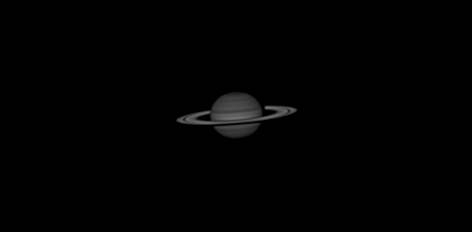

In [19]:
img_sum_R

In [20]:
# Converter as imagens para arrays numpy
arr_G_G = np.array(img_G_G)
arr_R_G = np.array(img_R_G)
arr_I_G = np.array(img_I_G)
arr_Z_G = np.array(img_Z_G)

# Somar as três imagens pixel a pixel
arr_G = arr_G_G + arr_R_G + arr_I_G + arr_Z_G

# Criar uma nova imagem a partir do array resultante
img_sum_G = Image.fromarray(arr_G)

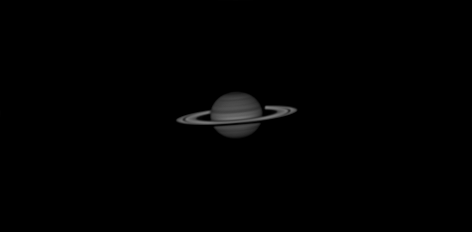

In [21]:
img_sum_G

In [22]:
# Converter as imagens para arrays numpy
arr_G_B = np.array(img_G_B)
arr_R_B = np.array(img_R_B)
arr_I_B = np.array(img_I_B)
arr_Z_B = np.array(img_Z_B)

# Somar as três imagens pixel a pixel
arr_B = arr_G_B + arr_R_B + arr_I_B + arr_Z_B

# Criar uma nova imagem a partir do array resultante
img_sum_B = Image.fromarray(arr_B)

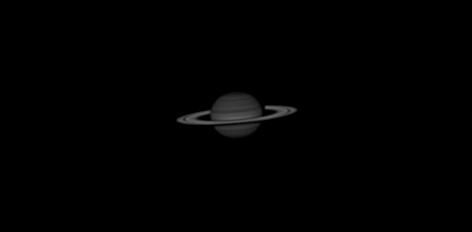

In [23]:
img_sum_B

In [24]:
A=3/weight_RGB

In [25]:
A

2.08594881699662

In [26]:
weight_R = A*1.0 #3.50  # ajuste manual do peso para a imagem R (vermelha)
weight_G = A*1.0 #3.50  # ajuste manual do peso para a imagem G (verde)
weight_B = A*1.0 #3.50  # ajuste manual do peso para a imagem B (azul)

# Supondo que weight_R, weight_G, weight_B são os pesos ajustados manualmente
img_final_R = img_sum_R.point(lambda p: p * weight_R)
img_final_G = img_sum_G.point(lambda p: p * weight_G)
img_final_B = img_sum_B.point(lambda p: p * weight_B)

In [27]:
output_path_R = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/combined_image_adjusted_R.png"
output_path_G = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/combined_image_adjusted_G.png"
output_path_B = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/combined_image_adjusted_B.png"

img_final_R.save(output_path_R)
img_final_G.save(output_path_G)
img_final_B.save(output_path_B)

In [28]:
#img_final_R = Image.open(img_final_R).convert("L")
#img_final_G = Image.open(img_final_G).convert("L")
#img_final_B = Image.open(img_final_B).convert("L")

img_final_R = Image.open(output_path_R).convert("L")
img_final_G = Image.open(output_path_G).convert("L")
img_final_B = Image.open(output_path_B).convert("L")

In [29]:
# Combinar as contribuições de R, G e B para formar a imagem final
img_final = Image.merge("RGB", (img_final_R, img_final_G, img_final_B))

# Combinar as camadas R, G e B em uma imagem final RGB
#img_final = Image.merge("RGB", (img_final_R.split()[0], img_final_G.split()[1], img_final_B.split()[2]))

# Salvar a imagem final no mesmo diretório em formato JPEG
output_path = "/home/fernando/Desktop/Saturno_SPARC4_Final_corrected/combined_image_adjusted.png"
img_final.save(output_path)

print("Imagem final ajustada e salva em:", output_path)


Imagem final ajustada e salva em: /home/fernando/Desktop/Saturno_SPARC4_Final_corrected/combined_image_adjusted.png


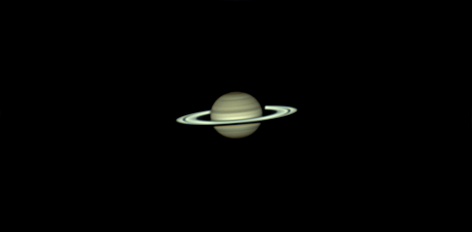

In [30]:
img_final